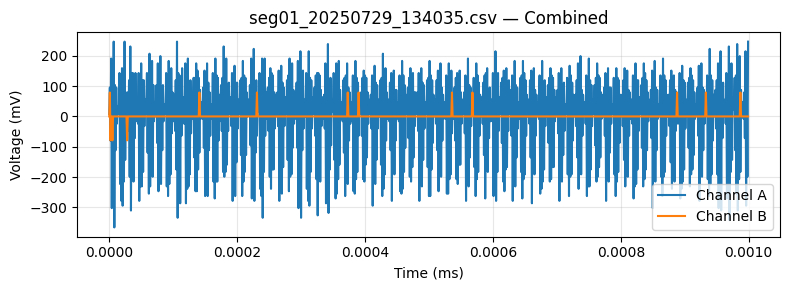

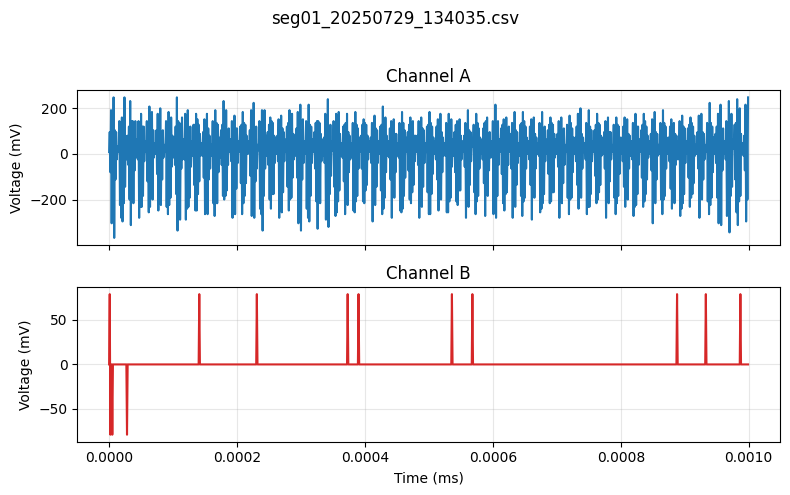

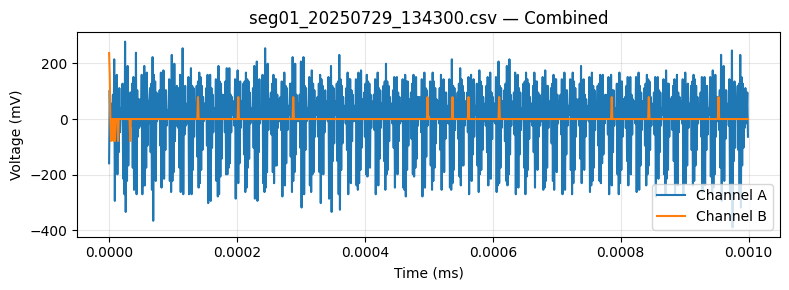

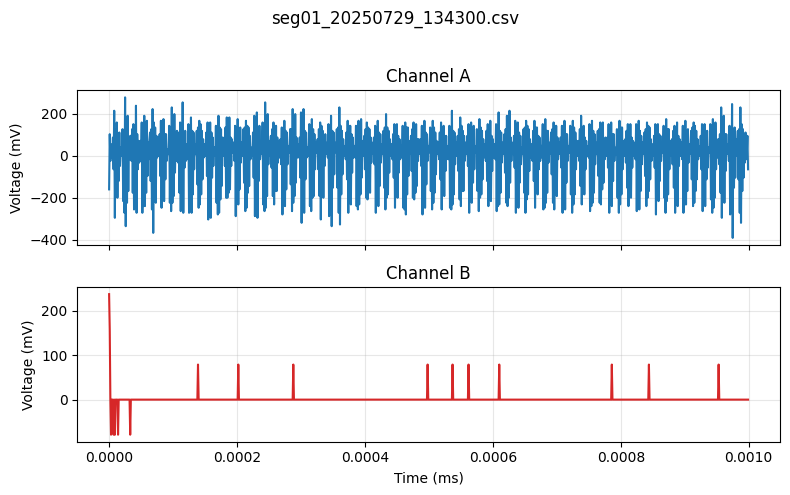

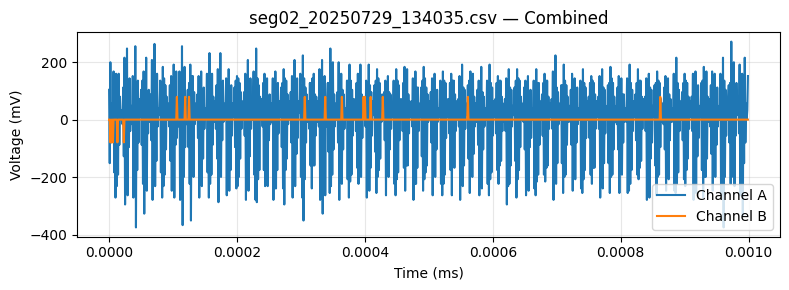

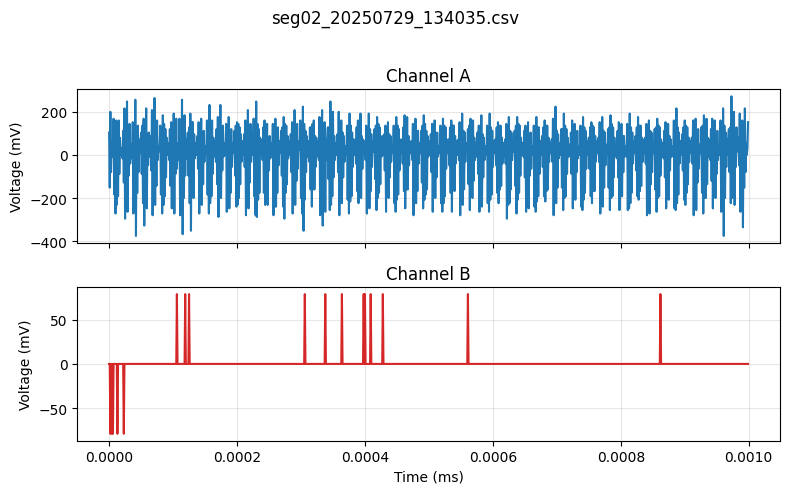

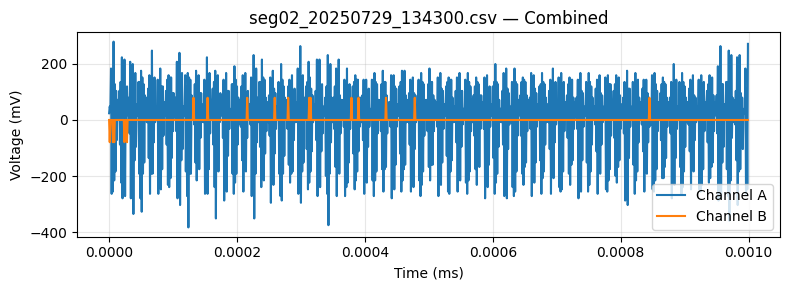

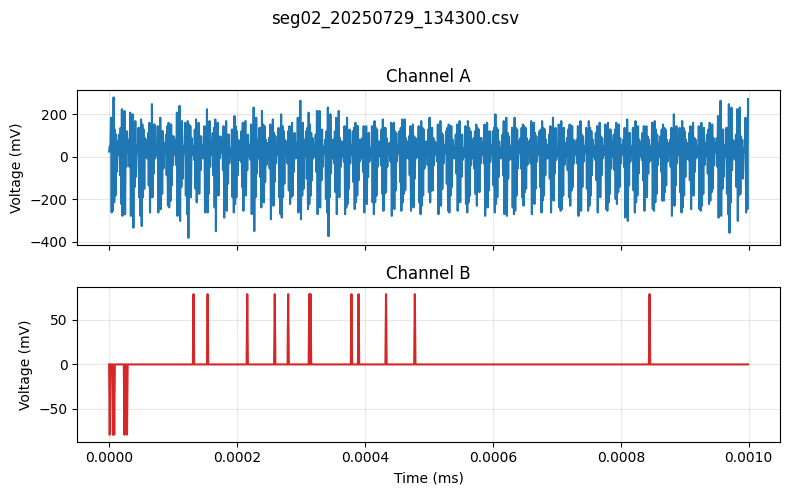

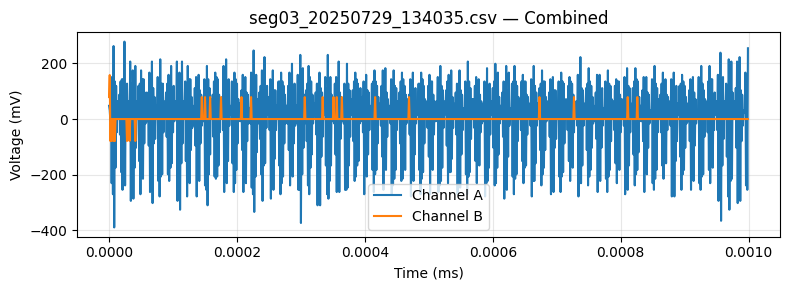

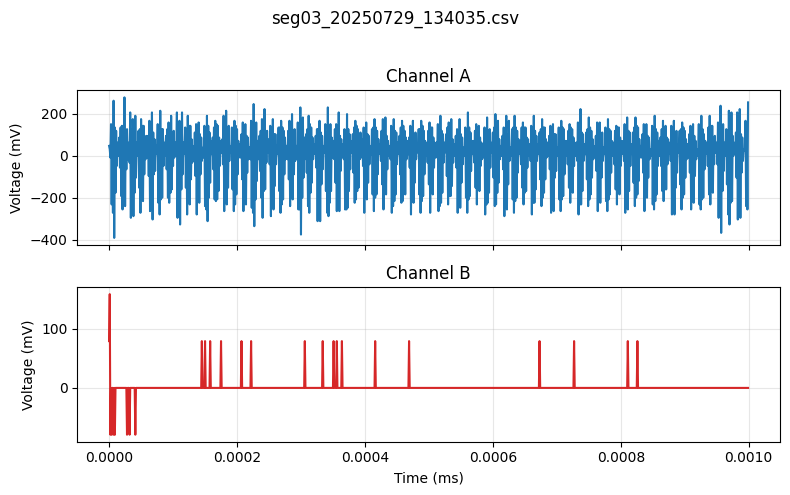

In [1]:
# %% [markdown]
# # PicoScope CSV Plotter
# 
# - Reads every `*.csv` in `csv_dir`
# - Computes time axis from sample index + sample rate
# - For each file:  
#   1. Combined plot (A + B)  
#   2. Separate subplots (A over time, B over time)

# %% 
import os, glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% [markdown]
# ## 1) Configuration

# %%
# directory containing your CSV exports
csv_dir = r"c:\Users\tberhanu\Desktop\workspace\picosdk-python-wrappers\captures_o4_2"

# sampling rate (change to whatever you used; e.g. 1e9 for 1 GS/s)
fs = 1e9  # Hz

# %% [markdown]
# ## 2) Helper to load one file

# %%
def load_pico_csv(path, fs):
    """
    Returns:
      t_ms : 1D np.array of time in milliseconds
      A    : channel A in mV
      B    : channel B in mV
    """
    # load with pandas (first column is just sample‐index)
    df = pd.read_csv(path)
    A = df['A (mV)'].to_numpy()
    B = df['B (mV)'].to_numpy()
    
    # compute time axis in ms
    n = len(df)
    dt = 1.0 / fs       # seconds per sample
    t_ms = np.arange(n) * dt * 1e3
    
    return t_ms, A, B

# %% [markdown]
# ## 3) Loop over CSVs and plot

# %%
csv_files = sorted(glob.glob(os.path.join(csv_dir, "*.csv")))
if not csv_files:
    raise RuntimeError(f"No CSVs in {csv_dir!r}")

for path in csv_files[:5]:
    fname = os.path.basename(path)
    t_ms, A, B = load_pico_csv(path, fs)
    
    # --- Combined plot ---
    plt.figure(figsize=(8, 3))
    plt.plot(t_ms, A, label='Channel A')
    plt.plot(t_ms, B, label='Channel B')
    plt.xlabel("Time (ms)")
    plt.ylabel("Voltage (mV)")
    plt.title(f"{fname} — Combined")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # --- Separate subplots ---
    fig, (axA, axB) = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
    axA.plot(t_ms, A)
    axA.set_ylabel("Voltage (mV)")
    axA.set_title("Channel A")
    axA.grid(alpha=0.3)
    
    axB.plot(t_ms, B, color='tab:red')
    axB.set_xlabel("Time (ms)")
    axB.set_ylabel("Voltage (mV)")
    axB.set_title("Channel B")
    axB.grid(alpha=0.3)

    plt.suptitle(fname)
    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()
